In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

### Data Cleaning

# The data in the 2015 files (Casualties and Vehicles) contained an extra column, which was needed to filter out. So I used  the data only till 2014.

data = pd.read_csv('full_data.csv')


In [3]:
data['convert_to_date'] = pd.to_datetime(data['Date'])

In [4]:
data['Day'] = data['convert_to_date'].dt.day
data['Month'] = data['convert_to_date'].dt.month
data['Year'] = data['convert_to_date'].dt.year

In [12]:
small_data = data.set_index('convert_to_date')

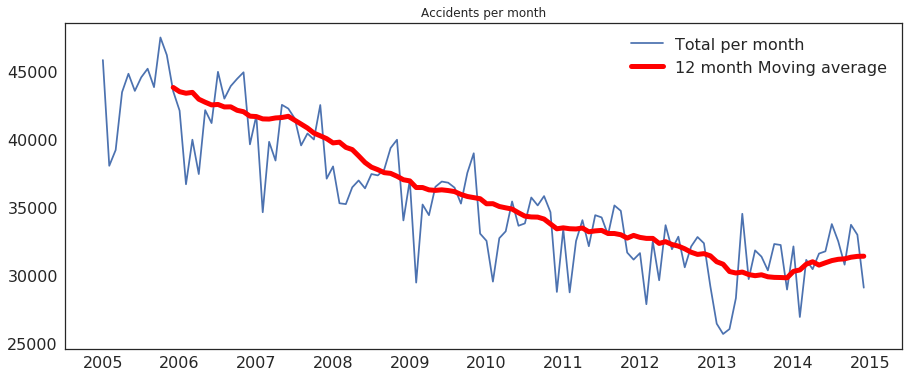

In [18]:
plt.figure(figsize=(15,6))
small_data.resample('M').size().plot(label='Total per month')
small_data.resample('M').size().rolling(window=12).mean().plot(color='red',linewidth=5,label='12 month Moving average')
plt.title('Accidents per month')
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)

In [20]:
data.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference_x',
       'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity',
       'Pedestrian_Locatio

In [24]:
small_data = data[['convert_to_date','Accident_Severity']]
small_data = small_data.dropna(axis=0)

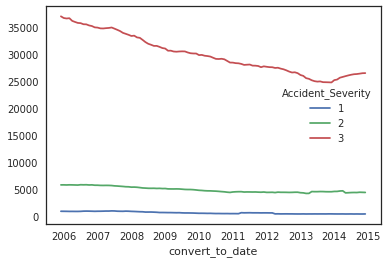

In [25]:
small_data.pivot_table(values='Accident_Severity', index='convert_to_date', columns='Accident_Severity',aggfunc=len).resample('M').sum().rolling(window=12).mean().plot()